In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df=pd.read_csv('C:/Users/Mehmet Nur Kavan/Desktop/machine_learning/301/Hitters.csv')
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"] # bağımlı değişken
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
x=pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [3]:
rf_model= RandomForestRegressor(random_state=42).fit(x_train, y_train)
rf_model

RandomForestRegressor(random_state=42)

In [4]:
y_pred= rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

model tuning

In [5]:
rf_params = {"max_depth": [5,8,10], "max_features": [2,5,10], "n_estimators": [200,500,1000,2000], "min_samples_split": [2,10,80,100]}

In [6]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [9]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [10]:
rf_model = RandomForestRegressor(random_state = 42, max_depth = 8, max_features = 2, min_samples_split = 2, n_estimators=200)
rf_tuned = rf_model.fit(x_train, y_train)
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [13]:
y_pred = rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

Değişken Önem Düzeyi

In [14]:
rf_tuned.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

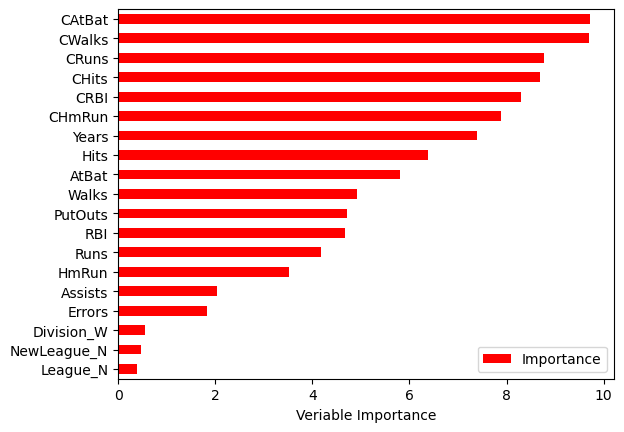

In [16]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100 }, index = x_train.columns)
Importance.sort_values(by = 'Importance', axis= 0, ascending = True).plot(kind= 'barh', color = 'r',)
plt.xlabel('Veriable Importance')
plt.gca().lengend_ = None